<H1> CAR BIKE Clasifier <H1>

In [3]:
#matrics math
import numpy as np
#access files
import os
#image data processing
import cv2
#plot image
import matplotlib.pyplot as plt
#save data
import pickle
#shuffle data
import random

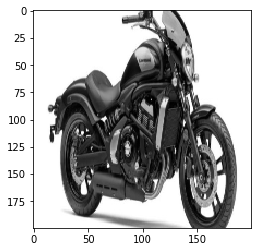

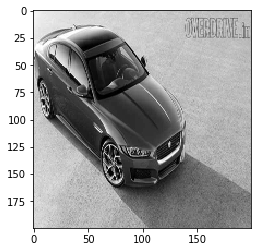

In [4]:
image_size = 200 #[image height width]
CATEGORY = ["bike","car"] #[type of data]
train_data = []
for category in CATEGORY:
    label = CATEGORY.index(category)
    path = category+"/"
    for file in os.listdir(path):
        image = cv2.imread(path+file,0)
        image = cv2.resize(image,(image_size,image_size))
        train_data.append([image,label])
    plt.imshow(image,cmap='gray')
    plt.show()
        #break

In [6]:
random.shuffle(train_data) #shuffing data

#Save data to disk
pickle.dump(train_data,open('train_data.pickle','wb'))
#load from disk
train_data = pickle.load(open('train_data.pickle','rb'))

x_data = []
y_data = []
for data_ in train_data:
    x_data.append(data_[0]) # input datas [X]
    y_data.append(data_[1]) # labels [y]

In [7]:
from keras.models import Sequential
from keras.layers import Dense , Flatten , Conv2D , MaxPool2D

Using TensorFlow backend.


In [8]:
#defining models
model=Sequential()

model.add(Conv2D(32,(3,3),activation="relu",input_shape=(image_size,image_size,1)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(16,(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(200,activation="relu"))
model.add(Dense(2,activation="softmax"))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
x_data = np.array(x_data).reshape(-1,image_size,image_size,1)/255.0
y_data = np.array(y_data)/1.0

In [10]:
model.fit(x_data,y_data,epochs=5)  # training 

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
381/381 [==============================] - 21s 55ms/step - loss: 0.9802 - acc: 0.5276
Epoch 2/5
381/381 [==============================] - 20s 52ms/step - loss: 0.4484 - acc: 0.8110
Epoch 3/5
381/381 [==============================] - 20s 52ms/step - loss: 0.2003 - acc: 0.9423
Epoch 4/5
381/381 [==============================] - 20s 52ms/step - loss: 0.1370 - acc: 0.9475
Epoch 5/5
381/381 [==============================] - 20s 52ms/step - loss: 0.0688 - acc: 0.9764


In [11]:
for n in range(10):
    g=model.predict(x_data[n:n+1])
    print(CATEGORY[np.argmax(g[0])],max(g[0])*100)
    #plt.imshow(x_data[n].reshape(image_size,image_size))
    #plt.show()

car 98.70333671569824
bike 99.71797466278076
bike 99.98117089271545
bike 99.99319314956665
bike 98.94279837608337
bike 96.70580625534058
car 99.68448877334595
bike 99.98893737792969
car 99.89560842514038
car 99.53938722610474


<h1>tensting with another image<h1>

In [12]:
imgb = cv2.imread("bike.jpg",0)
imgc = cv2.imread("car.jpg",0)
imgb = cv2.resize(imgb,(image_size,image_size))
imgc = cv2.resize(imgc,(image_size,image_size))

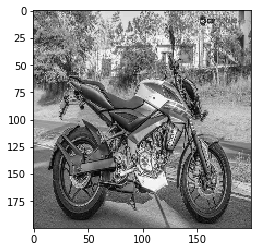

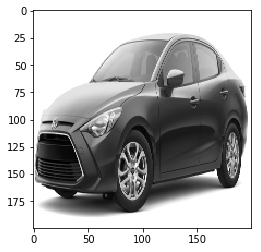

In [13]:
plt.imshow(imgb,cmap='gray')
plt.show()
plt.imshow(imgc,cmap='gray')
plt.show()

In [14]:
imgb = imgb/1.0
imgc = imgc/1.0
im_arr1 = imgb.reshape(1,image_size,image_size,1)
im_arr2 = imgc.reshape(1,image_size,image_size,1)

In [15]:
y_ = model.predict(im_arr1)
print(CATEGORY[np.argmax(y_[0])])
y_ = model.predict(im_arr2)
print(CATEGORY[np.argmax(y_[0])])

bike
car
